In [1]:
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import tools.dataTools as dt
from constants import Constants
import figure_params
import os
import pyaldata as pyal
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import scipy


figure_params.set_rc_params()

if not os.path.exists(Constants.FIG_FOLDER):
    os.makedirs(Constants.FIG_FOLDER)

SUBFIG_DIR = Constants.FIG_FOLDER + 'fig6/'
if not os.path.exists(SUBFIG_DIR):
    os.makedirs(SUBFIG_DIR)

#run simulations for figure, will take a while to run
import subprocess
os.chdir(Constants.PROJ_DIR)
# subprocess.run(["bash", "simulation/fig_simulations/fig6_sims.sh"]) #uncomment code to make datasets if not made yet

import warnings
warnings.filterwarnings("ignore")

In [2]:
seeds = Constants.SEEDS

ampA_reps = Constants.AMPSA1
ampB_reps = Constants.AMPSB1

ampA_pre = 'ampA1'
ampB_pre = 'ampB1'
cont_onehot_dataset = '_cont_onehot'

ampA_cont_onehot_ss = ampA_pre + cont_onehot_dataset
ampB_cont_onehot_ss = ampB_pre + cont_onehot_dataset

ymin = -16.5
ymax = 7.5

#### Loss during learning & adaptation for repertoires with sine waves of varied amplitudes (ampA)
Note: colors for loss curves for reassociation edited since only repertoires with 2-4 movs underwent reassocation


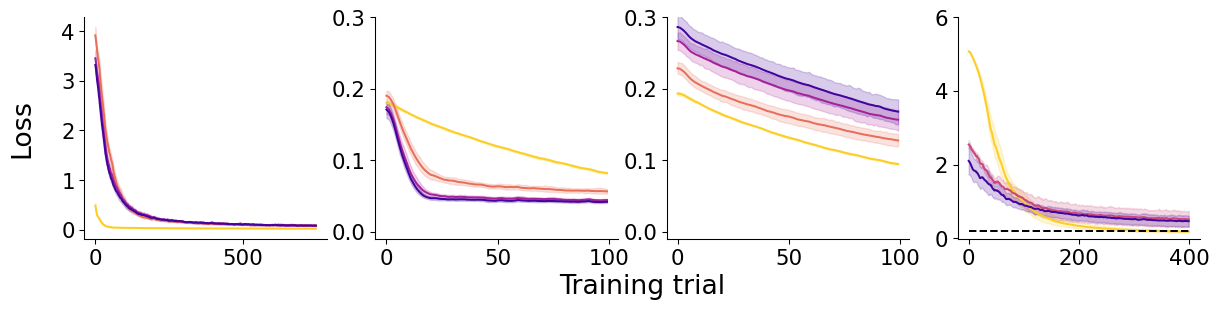

In [3]:
smooth = True
sim_set = ampA_cont_onehot_ss
reps = ampA_reps

fig, axs = plt.subplots(ncols = 4, figsize = (15,3))
g, params = dt.graph_loss(seeds, sim_set, reps, smooth=smooth, rel_loss = False, ax = axs[0])

for i, pert in enumerate([Constants.PERT_AMPLITUDE_A, Constants.PERT_AMPLITUDE_B, Constants.PERT_REASSOCIATION]):
    reps_ = reps[1:] if pert == Constants.PERT_REASSOCIATION else reps

    if pert == Constants.PERT_REASSOCIATION:
        g, params = dt.graph_loss(seeds, sim_set, reps_, pert, 0.0, 'v2', smooth=smooth, rel_loss = False, ax = axs[i+1])
    else:
        g, params = dt.graph_loss(seeds, sim_set, reps_, pert, 0.0, 'v1', smooth=smooth, rel_loss = False, ax = axs[i+1])

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')  

axs[1].set_ylim([-0.01, 0.3])
axs[2].set_ylim([-0.01, 0.3])
axs[3].set_ylim([-0.01, 6])
axs[3].hlines(0.2, color = 'k', linestyle = '--', xmin = 0, xmax = 400)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Training trial")
plt.ylabel("Loss")
plt.savefig(SUBFIG_DIR + f"{sim_set}_loss_reassoc400" +'.pdf', format='pdf', bbox_inches='tight')

#### Loss during learning & adaptation for repertoires with cosine waves of varied amplitudes (ampB)


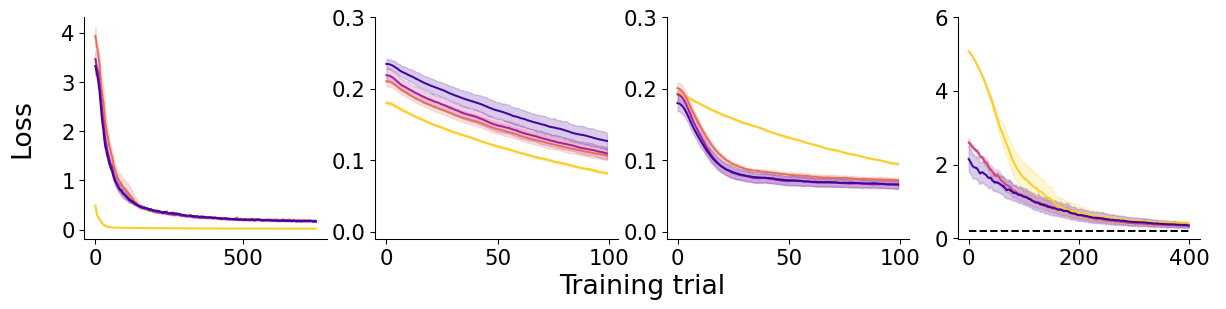

In [4]:
sim_set = ampB_cont_onehot_ss
reps = ampB_reps

fig, axs = plt.subplots(ncols = 4, figsize = (15,3))
g, params = dt.graph_loss(seeds, sim_set, reps, smooth=smooth, rel_loss = False, ax = axs[0])

for i, pert in enumerate([Constants.PERT_AMPLITUDE_A, Constants.PERT_AMPLITUDE_B, Constants.PERT_REASSOCIATION]):
    reps_ = reps[1:] if pert == Constants.PERT_REASSOCIATION else reps
    # g, params = dt.graph_loss(seeds, sim_set, reps_, pert, 0.0, 'v1', smooth=smooth, rel_loss = False, ax = axs[i+1])
    if pert == Constants.PERT_REASSOCIATION:
        g, params = dt.graph_loss(seeds, sim_set, reps_, pert, 0.0, 'v2', smooth=smooth, rel_loss = False, ax = axs[i+1])
    else:
        g, params = dt.graph_loss(seeds, sim_set, reps_, pert, 0.0, 'v1', smooth=smooth, rel_loss = False, ax = axs[i+1])


for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')  

axs[1].set_ylim([-0.01, 0.3])
axs[2].set_ylim([-0.01, 0.3])
axs[3].set_ylim([-0.01, 6])
axs[3].hlines(0.2, color = 'k', linestyle = '--', xmin = 0, xmax = 400)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Training trial")
plt.ylabel("Loss")
# plt.savefig(SUBFIG_DIR + f"{sim_set}_loss" +'.pdf', format='pdf', bbox_inches='tight')
plt.savefig(SUBFIG_DIR + f"{sim_set}_loss_reassoc400" +'.pdf', format='pdf', bbox_inches='tight')

#### Output fter learning and adaptation for varied sine waves (ampA) and varied cosine waves (ampB)

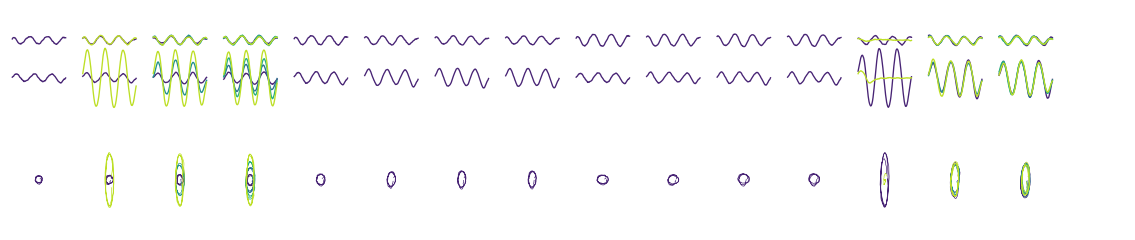

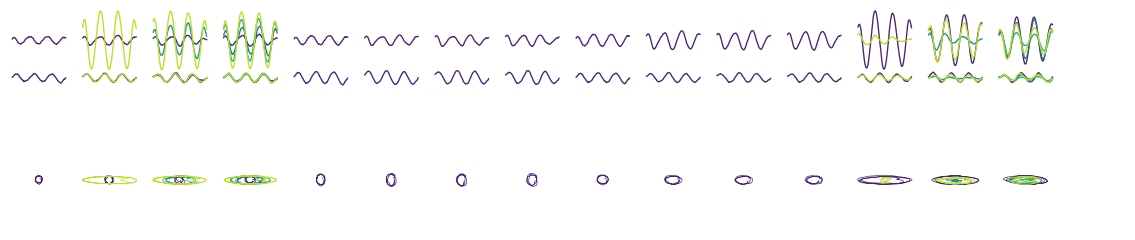

In [5]:
seed = seeds[2]
sim_set = ampA_cont_onehot_ss
reps = ampA_reps

for sim_set in [ampA_cont_onehot_ss, ampB_cont_onehot_ss]:
    reps = ampA_reps if sim_set == ampA_cont_onehot_ss else ampB_reps
    
    fig, axs = plt.subplots(nrows = 2, ncols = len(reps)*4, figsize = (15,3))
    for i, pert in enumerate([None, Constants.PERT_AMPLITUDE_A, Constants.PERT_AMPLITUDE_B, Constants.PERT_REASSOCIATION]):
        reps_ = reps[1:] if pert == Constants.PERT_REASSOCIATION else reps
        pert_param = None if pert is None else 0.0

        if pert is None:
            pert_set = None
        elif pert == Constants.PERT_REASSOCIATION:
            pert_set = 'v2'
        else:
            pert_set = 'v1'

        for j, rep in enumerate(reps_):
            c = i*4+j
            dt.graph_output(seed, sim_set, rep, perturbation = pert, pert_param=pert_param, pert_set = pert_set, graph_ntrials=1, ax = axs[0][c], alpha = 1.0, graph_movement=False)
            # ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1)
            axs[0][i*4+j].set_ylim([ymin,ymax])

            dt.graph_output(seed, sim_set, rep, perturbation = pert, pert_param=pert_param, pert_set = pert_set, graph_ntrials=1, ax = axs[1][c], alpha = 1.0, graph_movement=True)
            axs[1][c].set_xlim([-ymax,ymax])

    for ax in axs.ravel():
        ax.set_axis_off()

    plt.savefig(SUBFIG_DIR + f"{sim_set}_output" +'.pdf', format='pdf', bbox_inches='tight')

#### Percent of networks that adapted to reassociation perturbation 
based on cutoff of MSE < 0.4

In [6]:
import pandas as pd
import seaborn as sns
perturbation = Constants.PERT_REASSOCIATION
pert_param = 0.0
pert_set = 'v2'

mses_df = pd.DataFrame()

for sim_set in [ampA_cont_onehot_ss, ampB_cont_onehot_ss]:
    reps = ampA_reps if sim_set == ampA_cont_onehot_ss else ampB_reps
    mses_df_ = dt.get_testing_MSE_df(seeds,sim_set,reps[1:], perturbation,pert_param,pert_set)
    mses_df_['sim_set'] = sim_set
    mses_df = pd.concat([mses_df, mses_df_])

mses_df['nmovs']=mses_df['repertoire'].apply(lambda x: x.split('_')[1])
mses_df['adapted']=mses_df['mse'].apply(lambda x: x<0.4)

#get percent adapted
mses_df.groupby(['sim_set','nmovs'])['adapted'].mean()

sim_set            nmovs
ampA1_cont_onehot  2movs    1.0
                   3movs    0.5
                   4movs    0.5
ampB1_cont_onehot  2movs    0.6
                   3movs    0.8
                   4movs    0.6
Name: adapted, dtype: float64

#### Target trajectories

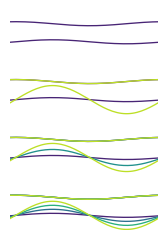

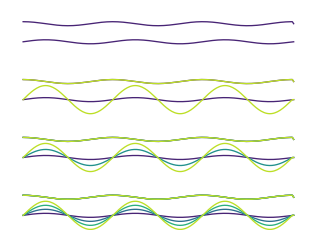

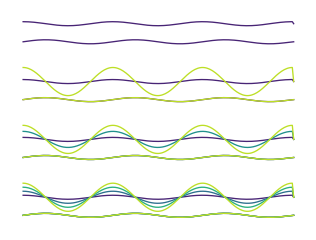

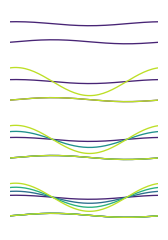

In [7]:
dataset = cont_onehot_dataset
fig, axs = plt.subplots(nrows = len(ampA_reps), figsize = (2,3))
for i, rep in enumerate(ampA_reps):
    ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1, graph_movement=False)
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([130,130+(200/3)])

plt.savefig(SUBFIG_DIR + f"{dataset}_single_wave_ampA_repertoire" +'.pdf', format='pdf', bbox_inches='tight')


fig, axs = plt.subplots(nrows = len(ampA_reps), figsize = (4,3))
for i, rep in enumerate(ampA_reps):
    ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1, graph_movement=False)
    ax.set_ylim([ymin,ymax])
    # ax.set_xlim([0,200/3])

plt.savefig(SUBFIG_DIR + f"{dataset}_ampA_repertoire" +'.pdf', format='pdf', bbox_inches='tight')

fig, axs = plt.subplots(nrows = len(ampA_reps), figsize = (4,3))
for i, rep in enumerate(ampA_reps):
    ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1, graph_movement=True)
    ax.set_ylim([-ymax,ymax])
    # ax.set_xlim([0,200/3])

plt.savefig(SUBFIG_DIR + f"{dataset}_movement_ampA_repertoire" +'.pdf', format='pdf', bbox_inches='tight')


fig, axs = plt.subplots(nrows = len(ampB_reps))
for i, rep in enumerate(ampB_reps):
    ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1, graph_movement=False)
    ax.set_ylim([ymin,ymax])

fig, axs = plt.subplots(nrows = len(ampB_reps), figsize = (2,3))
for i, rep in enumerate(ampB_reps):
    ax = dt.graph_repertoire(dataset,rep, ax = axs[i], graph_all=False, graph_ntrials = 1, graph_movement=False)
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([130,130+(200/3)])

plt.savefig(SUBFIG_DIR + f"{dataset}_single_wave_ampB_repertoire" +'.pdf', format='pdf', bbox_inches='tight')


#### perturbation trajectories

<Axes: >

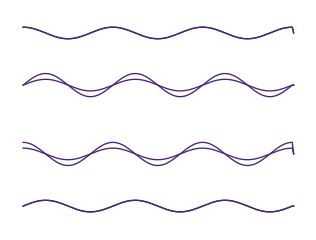

In [8]:
fig, axs = plt.subplots(nrows = 2)

rep = ampA_reps[0]
dataset = cont_onehot_dataset + '_pertampA'
dt.graph_repertoire(dataset,rep, ax = axs[0], graph_all=False, graph_ntrials = 1, graph_movement=False)

dataset = cont_onehot_dataset
dt.graph_repertoire(dataset,rep, ax = axs[0], graph_all=False, graph_ntrials = 1, graph_movement=False)

rep = ampB_reps[0]
dataset = cont_onehot_dataset + '_pertampB'
dt.graph_repertoire(dataset,rep, ax = axs[1], graph_all=False, graph_ntrials = 1, graph_movement=False)

dataset = cont_onehot_dataset
dt.graph_repertoire(dataset,rep, ax = axs[1], graph_all=False, graph_ntrials = 1, graph_movement=False)


### Comparison measures

In [23]:
def compare_simsets_cont_onehot(data, y):
    
    fig, axs = plt.subplots(figsize = (9,3), ncols = 2, sharey=True)

    for i, pert in enumerate([Constants.PERT_AMPLITUDE_A, Constants.PERT_AMPLITUDE_B]):

        for j, moveset_pre in enumerate([ampA_pre, ampB_pre]):

            sim_set = moveset_pre + '_cont_onehot'
            reps = ampA_reps if 'ampA' in sim_set else ampB_reps
            moveset = dt.get_moveset(reps[0])
            abr_dict = Constants.REPERTOIRE_ABR_DICTS[moveset]
            abr_reps = [abr_dict[key] for key in abr_dict.keys()]

            df = data[(data.sim_set == sim_set)&(data.perturbation == pert)]
            df['repertoire'] = df['repertoire'].apply(lambda x: abr_dict[x])

            line_color = 'grey' if j == 0 else 'lightgrey'
            line_style = 'solid' if j == 0 else 'dashed'

            colors = Constants.REPERTOIRE_COLORS[:]             
            g = sns.swarmplot(x="repertoire", y=y, data=df, palette = colors, alpha = 0.4, marker = 'o' if i == 0 else '^', ax=axs[i])
            g = dt.pointplot_across_repertoires(df, abr_reps, y, line_color, line_style, ax = axs[i], abr_labels=False)
            axs[i].set_title(moveset)

    axs[1].set_ylabel('')
    return g
    

### Exponential function

In [13]:
#exponential function
def exp_func(t, A, K, C):
    return A * np.exp(K * t) + C

smooth = True
learn_set = None
pert_param = 0.0
pert_set = 'v1'

rows_list = []

for perturbation in [Constants.PERT_AMPLITUDE_A, Constants.PERT_AMPLITUDE_B]:
    for sim_set in [ampA_cont_onehot_ss, ampB_cont_onehot_ss]:
        
        if perturbation == Constants.PERT_REASSOCIATION:
            reps = ampA_reps[1:] if 'ampA' in sim_set else ampB_reps[1:]
        else:
            reps = ampA_reps[:] if 'ampA' in sim_set else ampB_reps[:]

        for seed in seeds:
            for repertoire in reps:
                # decay constant
                try:
                    loss = dt.get_loss(seed, sim_set, repertoire, perturbation, pert_param, pert_set, smooth = smooth)
                    t = np.arange(1,len(loss)+1)
                    ## exponential fit
                    p0 = (0.1,-0.1,0.2) # starting search koefs
                    opt, pcov =  scipy.optimize.curve_fit(exp_func, t, loss, p0)
                    A, K, C = opt
                    fit_y = exp_func(t, A, K, C)
                except:
                    print('failed', seed, sim_set, repertoire, perturbation)
                    decay = np.nan
                    continue

                # relative weight change
                outdir = dt.get_outdir(seed, sim_set, repertoire, perturbation, pert_param, pert_set)
                init_weights = dt.get_model_weights(outdir,before_training=True)['rec']
                dws = dt.get_weight_changes(outdir)['rec']
                rel_dw = dt.rel_dw(dws, init_weights)
                rel_dw_med_abs = np.median(np.abs(rel_dw))

                temp = {
                    'seed': seed,
                    'sim_set': sim_set,
                    'repertoire': repertoire,
                    'perturbation': perturbation,
                    'pert_param': pert_param,
                    'pert_set': pert_set,
                    'decay': K,
                }
                rows_list.append(temp)

df = pd.DataFrame(rows_list)


In [17]:
df[df.perturbation == 'pertampA']

,seed,sim_set,repertoire,perturbation,pert_param,pert_set,decay
0,1000000,ampA1_cont_onehot,ampA1_1.0,pertampA,0.0,v1,-0.011113
1,1000000,ampA1_cont_onehot,ampA1_2movs_1_7,pertampA,0.0,v1,-0.090535
2,1000000,ampA1_cont_onehot,ampA1_3movs_1_7,pertampA,0.0,v1,-0.146898
3,1000000,ampA1_cont_onehot,ampA1_4movs_1_7,pertampA,0.0,v1,-0.135274
4,1000001,ampA1_cont_onehot,ampA1_1.0,pertampA,0.0,v1,-0.010338
...,...,...,...,...,...,...,...
75,1000008,ampB1_cont_onehot,ampB1_4movs_1_7,pertampA,0.0,v1,-0.008053
76,1000009,ampB1_cont_onehot,ampB1_1.0,pertampA,0.0,v1,-0.013093
77,1000009,ampB1_cont_onehot,ampB1_2movs_1_7,pertampA,0.0,v1,-0.014029
78,1000009,ampB1_cont_onehot,ampB1_3movs_1_7,pertampA,0.0,v1,-0.011023


### Decay constant

#### ampA perturbation

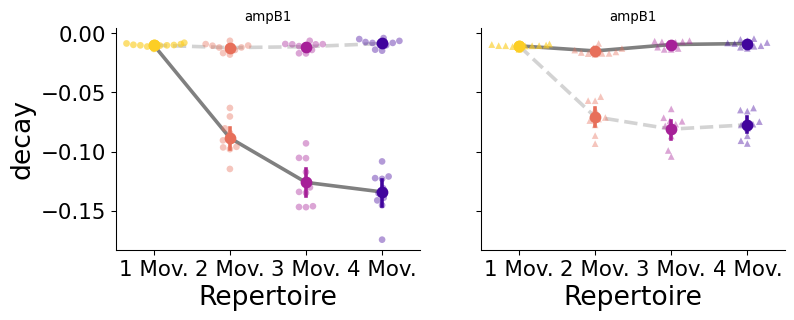

In [24]:
g = compare_simsets_cont_onehot(df, 'decay')
g.set_ylabel('Decay constant')
plt.savefig(SUBFIG_DIR + f"cont_onehot_decay" +'.pdf', format='pdf', bbox_inches='tight')